<a href="https://colab.research.google.com/github/43pratik/DL_Lab/blob/main/DL_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/diabetes.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: diabetes.csv not found. Please provide the correct path to the file.")

Dataset loaded successfully.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

df.fillna(df.mean(), inplace=True)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessing complete.")

Data preprocessing complete.


In [ ]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

print("Data prepared for Gradient Descent.")

Data prepared for Gradient Descent.


In [ ]:
theta = np.zeros((X_b.shape[1], 1))

learning_rate = 0.01
n_iterations = 1000

cost_history = []

for iteration in range(n_iterations):
    predictions = X_b.dot(theta)

    errors = predictions - y.values.reshape(-1, 1)

     gradient = 2/len(y) * X_b.T.dot(errors)

     theta = theta - learning_rate * gradient

     cost = np.mean(errors**2)
    cost_history.append(cost)

     if iteration % 100 == 0:
        print(f"Iteration {iteration}: Cost = {cost}")

print("\nGradient Descent complete.")
print("Optimized parameters (theta):\n", theta)

Iteration 0: Cost = 0.3489583333333333
Iteration 100: Cost = 0.15829927023046808
Iteration 200: Cost = 0.15454056980987793
Iteration 300: Cost = 0.15430358650305262
Iteration 400: Cost = 0.1542774013766419
Iteration 500: Cost = 0.15427402674234258
Iteration 600: Cost = 0.15427357033288724
Iteration 700: Cost = 0.15427350661952485
Iteration 800: Cost = 0.15427349746362118
Iteration 900: Cost = 0.15427349610981458

Gradient Descent complete.
Optimized parameters (theta):
 [[ 0.34895833]
 [ 0.06967871]
 [ 0.19669513]
 [-0.01373869]
 [ 0.00170221]
 [-0.00765951]
 [ 0.09876826]
 [ 0.04280775]
 [ 0.0245878 ]]


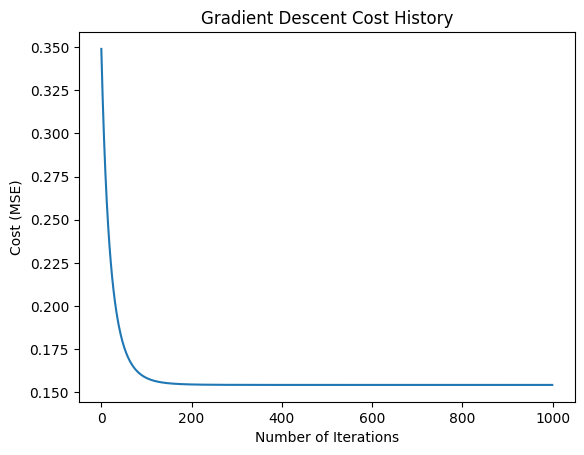

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(n_iterations), cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost History")
plt.show()